
# Local Thickness of Gel Network

---
### Local thickness is the diameter of the largest sphere that fits inside the object and contains all the points. In 3D: 

![Visualization of local thickness in 3D](https://qim.dk/wp-content/uploads/2023/06/initial_example.png) 

[Image taken from https://qim.dk](https://qim.dk/portfolio-items/local-thickness/)
[Link](https://www.optinav.info/LocalThicknessEd.pdf)

---
# Instructions
---
## Required Python Packages and Setup

To estimate the local thickness from microscopy images you need to install required packages and perform thickness measurement. Follow the instruction below:


## Step 1: Install Required Packages

1. Install the latest version of Python (if not already installed) using [Anaconda](https://www.anaconda.com/download)

2. Install the following packages:
  
  ```bash
     pip install skimage matplotlib seaborn localthickness
   ```
3. Open the anaconda prompt and type `jupyter notebook`. Then open a new python3 file`.ipynb`

The `localthickness` package allows us to compute local thickness directly from a binarized image. For more details, visit the localthickness [documentation](https://pypi.org/project/localthickness/). 

## Step 2: Code to Measure Local Thickness of a Gel Netowrk in a Microscopy Image

### Input:
- **Microscopy Image**: Load the image file for thickness analysis.
- **pixel_size_dist**: Set pixel-to-distance conversion (e.g., pixel_size_dist = 1 / 1.7).

### Output:
- A matrix named `thickness` containing local thickness values.
- An image named `thickness_image.svg` showing the calculated local thickness.

---
### Example:

```python
# Import necessary libraries
from skimage import io
import matplotlib.pyplot as plt
import seaborn as sns
from localthickness import LocalThickness

# Load the microscopy image
image_path = 'C:\Users\hlama\Desktop\Venkat_Image_Analysis\OA - 4.5_.tif'
microscopy_image = io.imread(image_path)

# Define pixel-to-distance conversion
pixel_size_dist = 1 / 1.7 #1 pixel = 1/1.7 um

# Calculate local thickness
lt = LocalThickness(microscopy_image, rescale=pixel_size_dist)
thickness = lt.local_thickness

# Save and display the local thickness as an image
plt.figure(figsize=(8, 6))
sns.heatmap(thickness, cmap='viridis')
plt.title('Local Thickness')
plt.axis('off')
plt.savefig("thickness_image.svg", format='svg')
plt.show()
```
---

```
Cite: 
  @inproceedings{dahl2023fast,
  title={Fast Local Thickness},
  author={Dahl, Vedrana Andersen and Dahl, Anders Bjorholm},
  booktitle={Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition Workshops},
  pages={4335--4343},
  year={2023}
}
```
---
### Here is a detail illustration:

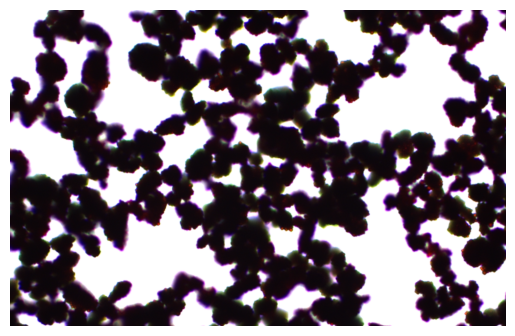

In [1]:
import skimage.io as io
import skimage.filters as filters
import matplotlib.pyplot as plt
import localthickness as lt

# Read the image
image = io.imread(r'C:\Users\hlama\Desktop\Venkat_Image_Analysis\OA - 4.5_.tif')#DOA-1_

# Apply Sobel filter to detect edges
#edges = filters.sobel(image)

# Display the edges using matplotlib
plt.imshow(image, cmap='gray')
plt.axis('off')  # Hide axes for better visualization
plt.show()

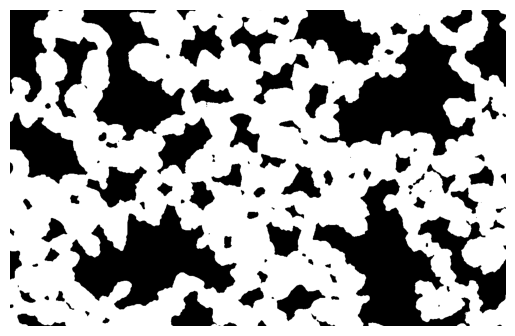

In [2]:
from skimage import util 
import skimage as ski
from skimage.filters import threshold_otsu  
from skimage import util

image = ski.color.rgb2gray(image)
thresh = threshold_otsu(image)
binary = image > thresh
bw = util.invert(binary)# invert the image

# Display the binarized image using matplotlib
plt.imshow(bw,  cmap=plt.cm.gray)
plt.axis('off')  # Hide axes for better visualization
plt.show()

---

### Display Local Thickness of Feautres 

The `thickness` variable is a matrix, with each element representing the local thickness value at that position. 

- **Saving Thickness Data**: You can save the `thickness` matrix and plot it in MATLAB for further analysis if needed.
- **Local Thickness Plot**: The visualized local thickness is saved as `thickness_image.svg`. The `*.svg` is a vector format image, you can change to any format (`.*png`, `.*tif`...) as per your need. 
--- 



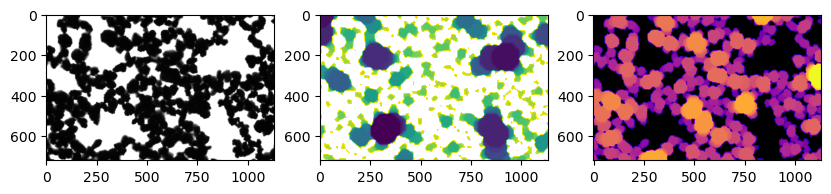

In [3]:
B = bw #inlucde the binarize image
# Compute thickness and separation.
import localthickness as lt
thickness = lt.local_thickness(B)
separation = lt.local_thickness(~B)

# Visualize.
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].imshow(image,  cmap=plt.cm.gray)
ax[1].imshow(separation, cmap=lt.white_viridis())
ax[2].imshow(thickness, cmap=lt.black_plasma())
plt.show()

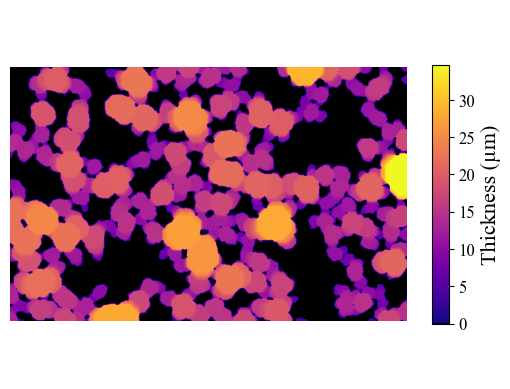

In [4]:
pixel_size_dist = 1/1.7 #Pixel to distance conversion
plt.imshow(thickness*(pixel_size_dist), cmap=lt.black_plasma())

# Add a colorbar and set its font properties
cbar = plt.colorbar(shrink=0.7, aspect=15)
cbar.ax.tick_params(labelsize=12)  # Set the font size for the colorbar

for label in cbar.ax.get_yticklabels():
    label.set_fontname('Times New Roman')  # Set font for colorbar tick labels

# Label the colorbar with specific font settings
cbar.set_label('Thickness (µm)', fontsize=16, fontname='Times New Roman')  # Label with font properties

# Set font size and name for the x and y ticks
plt.xticks(fontsize=16, fontname='Times New Roman')  # Font size and name for x-axis ticks
plt.yticks(fontsize=16, fontname='Times New Roman')  # Font size and name for y-axis ticks

# Save the image
plt.savefig('thickness_image.svg', dpi=300, bbox_inches='tight')
plt.axis('equal')
plt.axis('off')
# Show the image
plt.show()

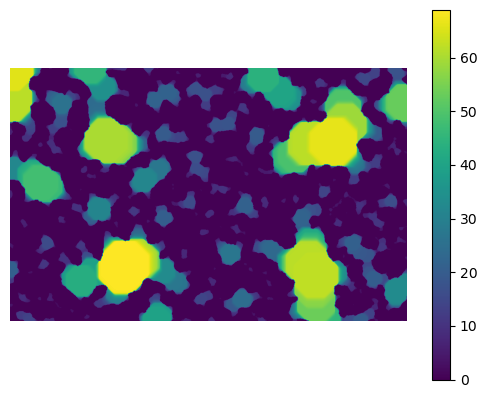

In [5]:
# Show the separation
plt.imshow(separation, cmap='viridis')  # You can choose a different colormap if needed
plt.colorbar()  # Adds the colorbar
#plt.title('Local Thickness')  # Optional: Add a title
plt.axis('off')  # Optional: Hide axes if needed
plt.show()  # Display the plot

## Show the plot statistics of the thickness distribution:

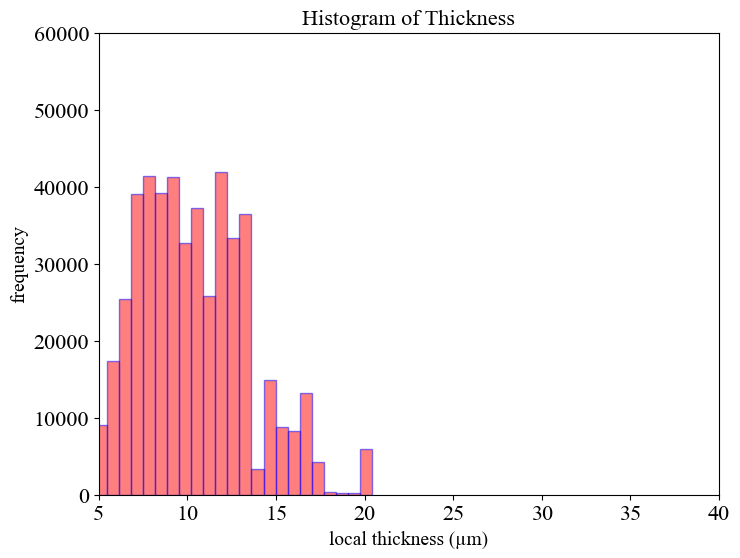

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'thickness' is the array containing your data
plt.figure(figsize=(8, 6))

# Plot histogram of thickness data with 30 bins
thickness = thickness*(pixel_size_dist)
plt.hist(thickness.ravel(), bins=30, color='red', alpha=0.5, edgecolor='blue')

# Plot the histogram and KDE line over it
#sns.histplot(thickness.ravel(), bins=10, kde=True, color='black', edgecolor='none', alpha=0.5)
#sns.histplot(thickness.ravel(), bins=50, color='red', edgecolor=None, alpha=0.5, kde=True, kde_kws={'color': 'black', 'linewidth': 2})


# Customize labels and title with font settings
plt.xlabel('local thickness (µm)', fontsize=14, fontname='Times New Roman')
plt.ylabel('frequency', fontsize=14, fontname='Times New Roman')
plt.title('Histogram of Thickness', fontsize=16, fontname='Times New Roman')
plt.xlim([5,40])
plt.ylim([0, 60000])

# Set font size and name for the x and y ticks
plt.xticks(fontsize=16, fontname='Times New Roman')  # Font size and name for x-axis ticks
plt.yticks(fontsize=16, fontname='Times New Roman')  # Font size and name for y-axis ticks

# Save the image
plt.savefig('histogram_thickness_image.svg', dpi=300, bbox_inches='tight')
# Show the image

# Display the histogram
plt.show()
